<a href="https://colab.research.google.com/github/Sinethemba-nongqoto/Research-project/blob/master/Analysis_0f_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries
---
1. **Data Manipulation**
- Pandas, numpy
2. **Data Visualization**
- Matplotlib, seaborn

In [83]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
import holidays

sa_holidays= holidays.SouthAfrica()

## Loading the raw data

In [84]:
features_data = pd.read_csv('https://raw.githubusercontent.com/Sinethemba-nongqoto/Research-project/master/data/Features%20data%20set.csv')
sales_data = pd.read_csv('https://raw.githubusercontent.com/Sinethemba-nongqoto/Research-project/master/data/sales%20data-set.csv')
stores_data = pd.read_csv('https://raw.githubusercontent.com/Sinethemba-nongqoto/Research-project/master/data/stores%20data-set.csv')

In [85]:
sales_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [86]:
features_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [87]:
stores_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [88]:
# Complete the call to convert the date column
sales_data['Date'] =  pd.to_datetime(sales_data['Date'])
features_data['Date'] =  pd.to_datetime(features_data['Date'])

# Confirm the date column is in datetime format
print(sales_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB
None


# Description analysis

In [89]:

print(sales_data.shape)
print(features_data.shape)
print(stores_data.shape)

print(sales_data[0:1].Date, sales_data[-1:].Date)
print(features_data[0:1].Date, features_data[-1:].Date)

(421570, 5)
(8190, 12)
(45, 3)
0   2010-05-02
Name: Date, dtype: datetime64[ns] 421569   2012-10-26
Name: Date, dtype: datetime64[ns]
0   2010-05-02
Name: Date, dtype: datetime64[ns] 8189   2013-07-26
Name: Date, dtype: datetime64[ns]


# Preprocessing
---
Exploring the descriptive statistics of the variables

In [90]:

sales_data.describe(include= 'all')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,Store,Dept,Date,Weekly_Sales,IsHoliday
count,421570.000000,421570.000000,421570,421570.000000,421570
unique,NaN,NaN,143,NaN,2
top,NaN,NaN,2011-12-23 00:00:00,NaN,False
freq,NaN,NaN,3027,NaN,391909
first,NaN,NaN,2010-01-10 00:00:00,NaN,NaN
last,NaN,NaN,2012-12-10 00:00:00,NaN,NaN
mean,22.200546,44.260317,NaN,15981.258123,NaN
std,12.785297,30.492054,NaN,22711.183519,NaN
min,1.000000,1.000000,NaN,-4988.940000,NaN
25%,11.000000,18.000000,NaN,2079.650000,NaN


In [91]:
features_data.describe(include ='all')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
count,8190.000000,8190,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000,8190
unique,NaN,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,2011-07-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7605
first,NaN,2010-01-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2013-12-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.000000,NaN,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821,NaN
std,12.987966,NaN,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259,NaN
min,1.000000,NaN,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,NaN
25%,12.000000,NaN,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000,NaN


In [92]:
stores_data.describe(include = 'all')

,Store,Type,Size
count,45.000000,45,45.000000
unique,NaN,3,NaN
top,NaN,A,NaN
freq,NaN,22,NaN
mean,23.000000,NaN,130287.600000
std,13.133926,NaN,63825.271991
min,1.000000,NaN,34875.000000
25%,12.000000,NaN,70713.000000
50%,23.000000,NaN,126512.000000
75%,34.000000,NaN,202307.000000


# Merge the data in a unique DataFrame
---

In [93]:
sales_df = pd.merge(sales_data,features_data, on=['Store', 'Date', 'IsHoliday'], how='left')

sales_df = pd.merge(sales_df, stores_data, on = ['Store'], how='left')

#for missing values we put 0 to all NaN

sales_df = sales_df.fillna(0)
# converting temperature to degrees celcius 
sales_df['Temperature'] = (sales_df['Temperature']- 32) * 5./9.

types_encoded, types = sales_df['Type'].factorize()
sales_df['Type'] = types_encoded

sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
1,1,1,2010-12-02,46039.49,True,3.616667,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315
2,1,1,2010-02-19,41595.55,False,4.405556,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315
3,1,1,2010-02-26,19403.54,False,8.127778,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315
4,1,1,2010-05-03,21827.90,False,8.055556,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315


# Check data and features

In [94]:
print('training_data duplicated:{}'.format(sales_df.duplicated().sum()))
sales_df.drop_duplicates(inplace =True)

training_data duplicated:0


In [95]:
tab_info = pd.DataFrame(sales_df.dtypes).T.rename(index={0:'column Type'})
tab_info = tab_info.append(pd.DataFrame(sales_df.isnull().sum()).T.rename(index={0:'null values(nb)'}))
tab_info = tab_info.append(pd.DataFrame(sales_df.isnull().sum()/sales_df.shape[0]*100).T.rename(index={0: 'null values(%)'}))

tab_info

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
column Type,int64,int64,datetime64[ns],float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
null values(nb),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
null values(%),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Gain some graphichal insight
---

Plot some of the variables present in the data frame such as temperature, fuel price, CPI, unemployment rate, ...

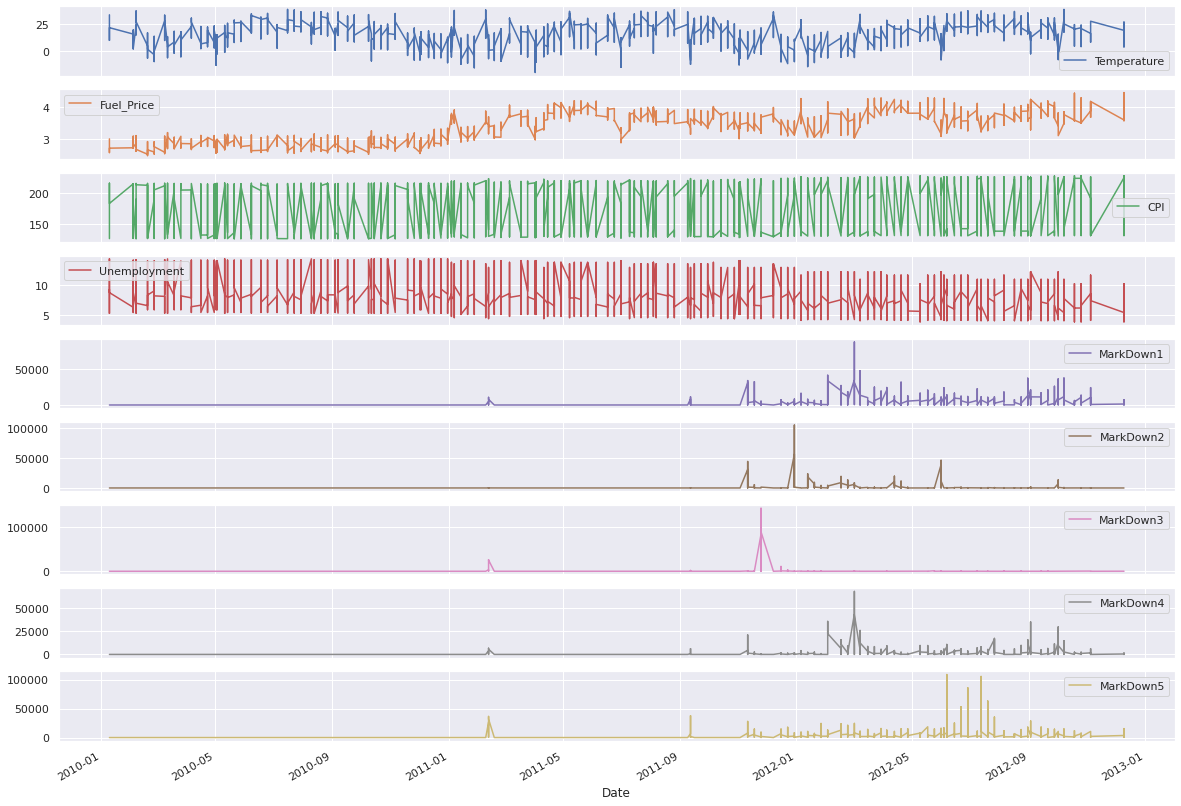

In [96]:
sales_df[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize= (20, 15))
plt.show()

We sum the weekly sales from every shop to get the total weekly sales volume of the retail chain 

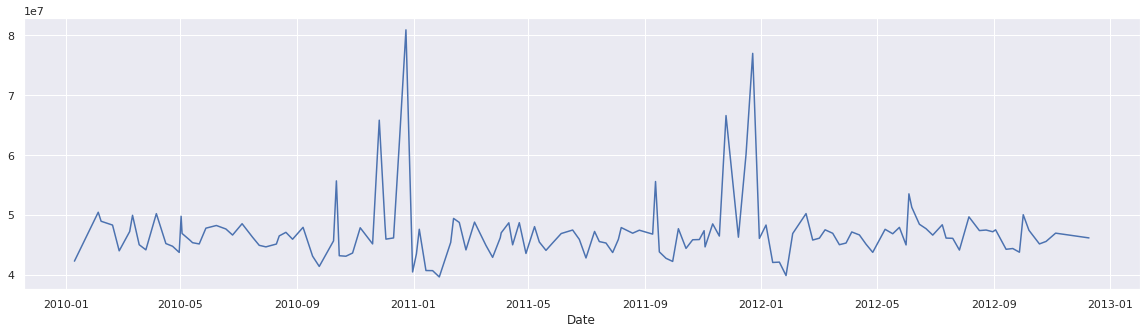

In [97]:
sales_df_average_sales_week = sales_df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
sales_df_average_sales =sales_df_average_sales_week.sort_values('Weekly_Sales', ascending=False)

plt.figure(figsize=(20,5))
plt.xlabel('Date')
plt.plot(sales_df_average_sales_week.Date, sales_df_average_sales_week.Weekly_Sales)
plt.show()

In [98]:
### Testing for Stationary
from statsmodels.tsa.stattools import adfuller

In [99]:
test_result = adfuller(sales_df_average_sales_week['Weekly_Sales'])

In [100]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(Weekly_Sales):
  result= adfuller(Weekly_Sales)
  labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations used']
  for value, label in zip(result,  labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print('Strong evidence against the null hypothesis (H0), reject the null hypothesis. Weekly sales is stationary ')
  else:
    print('Weak evidence against null hypothesis, time series has a unit root, indicating it is not stationary')

In [101]:
adfuller_test(sales_df_average_sales_week['Weekly_Sales'])

ADF Test Statistic : -9.837721580746784
p-value : 4.84510284992098e-17
#Lags Used : 0
Number of Observations used : 142
Strong evidence against the null hypothesis (H0), reject the null hypothesis. Weekly sales is stationary 


* In the data visualization of weekly sales, the Weekly Sales have been tested for stationarity. Since there is a strong evidence against the null hypothesis (H0), we reject the H0 and conclude that it is stationary

# Get more insights

In [102]:
# The more remunerative weeks
sales_df_average_sales.head() 

,Date,Weekly_Sales
46,2010-12-24,80931415.60
98,2011-12-23,76998241.31
95,2011-11-25,66593605.26
41,2010-11-26,65821003.24
45,2010-12-17,61820799.85


In [103]:
st = sales_df_average_sales_week.set_index('Date')
#st = st.resample('H').ffill()
#st = st.resample('W').sum()

In [104]:
# The least remunerative weeks
sales_df_average_sales[::-1].head()

,Date,Weekly_Sales
52,2011-01-28,39599852.99
103,2012-01-27,39834974.67
47,2010-12-31,40432519.00
51,2011-01-21,40654648.03
50,2011-01-14,40673678.04


In [105]:
# Top performing type of stores in term of sales

sales_df_type_top_stores = sales_df.groupby(by=['Type'], as_index=False)['Weekly_Sales'].sum()
sales_df_type_top_stores.sort_values('Weekly_Sales', ascending=False)

,Type,Weekly_Sales
0,0,4.331015e+09
1,1,2.000701e+09
2,2,4.055035e+08


In [106]:
# Top 5 performing stores in term of sales
sales_df_top_stores =sales_df.groupby(by=['Store'], as_index=False)['Weekly_Sales'].sum()
sales_df_top_stores.sort_values('Weekly_Sales', ascending=False)[:5]

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08


# Forecast of the total sales volume

---
**Final thoughts on Autocorrelation and Partial Autocorrelation**
- Identification of an AR model is often done with PACF.
  - For an AR model, the theoretical PACF "shuts off" past the order of the model. The phrase "shuts off" means that in theory the partial correlations are equal to 0 beyond that point. Put another way, the number non-zero partial autocorrelations gives the order of the AR model. By the "order of the model" we mean the most extreme lag of x that is used as a predictor.

- identification of an MA model is often done with the ACF rather than the PACF.
  - For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is i the ACF. The ACF will have non-zero autorerrelations only at lags involved in the model.

  p,q,d
  p AR model lags
  d differencing
  q MA lags

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


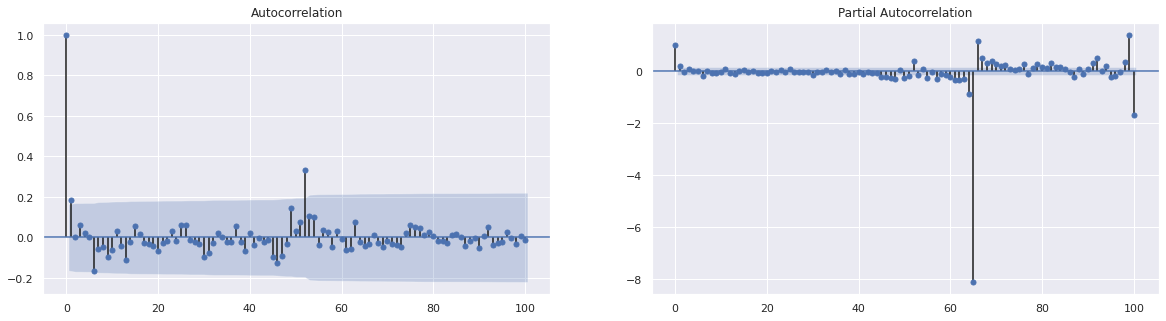

In [107]:
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf

fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(st, lags =100, ax=axes[0])
plot_pacf(st, lags=100, ax=axes[1])
plt.show()

# Model definition
---
Since the AR model we implemented in the statsmodels library allows to include  only consecutive seasonality terms, I implement the model manually. In this way I can use non consecutive seasonality terms like weeks 1, 6,18,38, 52 as observed from the correlation analysis.

In [108]:
from sklearn.linear_model import LinearRegression
def fit_ar_model(st, orders):

  X=np.array([st.values[(i-orders)].squeeze() if i>=np.max(orders) else np.array(len(orders)*[np.nan]) for i in range(len(st))])

  mask = ~np.isnan(X[:,:1]).squeeze()

  Y= st.values

  lin_reg = LinearRegression()
  lin_reg.fit(X[mask], Y[mask])

  print(lin_reg.coef_, lin_reg.intercept_)
  print('Score factor: %.2f' % lin_reg.score(X[mask], Y[mask]))

  return lin_reg.coef_, lin_reg.intercept_

def predict_ar_model(st, orders, coef, intercept):
  return np.array([np.sum(np.dot(coef, st.values[(i-orders)].squeeze())) + intercept if i >= np.max(orders) else np.nan for i in range(len(st))])
















Given the seasonality observed from the ACF and the PACF function, the AR model is implemented including seasonality from weeks (1,6,18,38,52).


[[ 0.13329532 -0.06907274 -0.03586096 -0.0054098   0.52940272]] [21199007.69344223]
Score factor: 0.41


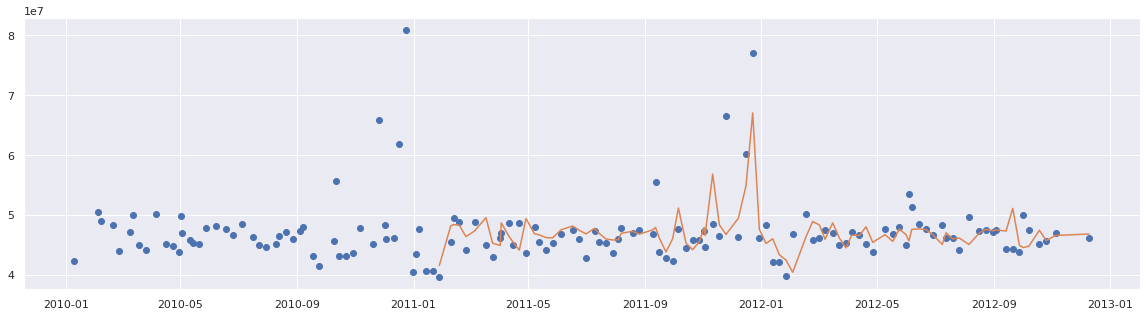

In [109]:


orders=np.array([1,6,18,38,52])
coef, intercept = fit_ar_model(st,orders)
pred=pd.DataFrame(index=st.index, data=predict_ar_model(st, orders, coef, intercept))
plt.figure(figsize=(20,5))
plt.plot(st, 'o')
plt.plot(pred)
plt.show()



AR Residuals: avg -0.00, std 0.07


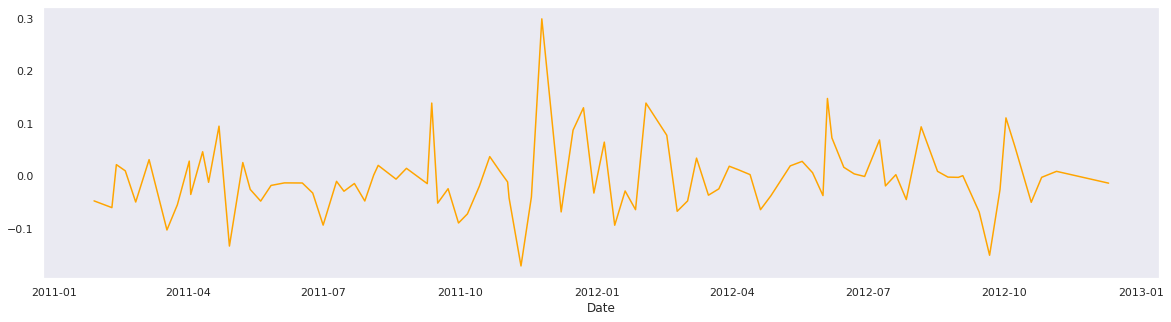

In [110]:
diff=(st['Weekly_Sales']-pred[0])/st['Weekly_Sales']

print('AR Residuals: avg %.2f, std %.2f' % (diff.mean(), diff.std()))
 
plt.figure(figsize=(20,5))
plt.plot(diff, c='orange')
plt.xlabel('Date')
plt.grid()
plt.show()



The predictive model has an R^2 score factor of 0.41 (max score for perfect prediction would be 1). The residual distribution is centered in 0 with an STD of 7%.


# Forecast of the store-wise sales volume
---

We develop the forecast model for the store number 20, which shows the highest sales volume.


In [111]:
df20=sales_df.where( sales_df['Store'] == 20)
df20=df20.dropna()
df20=df20.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df20 = df20.set_index('Date')
df20.sort_values('Weekly_Sales', ascending=False)
df20.tail()

,Weekly_Sales
Date,
2012-10-08,2144245.39
2012-10-19,1999363.49
2012-10-26,2031650.55
2012-11-05,2168097.11
2012-12-10,2162951.36


In [112]:

df20.describe()

,Weekly_Sales
count,1.430000e+02
mean,2.107677e+06
std,2.759006e+05
min,1.761017e+06
25%,1.950866e+06
50%,2.053165e+06
75%,2.155186e+06
max,3.766687e+06


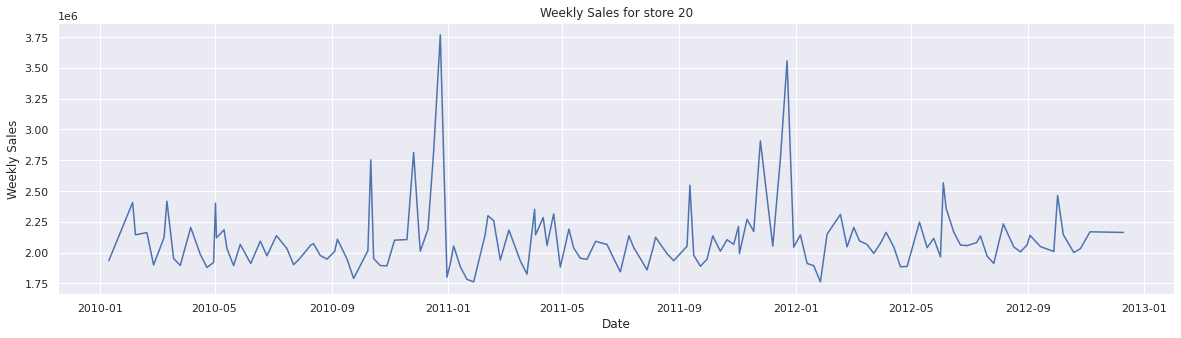

In [113]:
plt.figure(figsize=(20,5))
plt.plot(df20.index, df20.values)
plt.title('Weekly Sales for store 20')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

# Auto Regressive Model


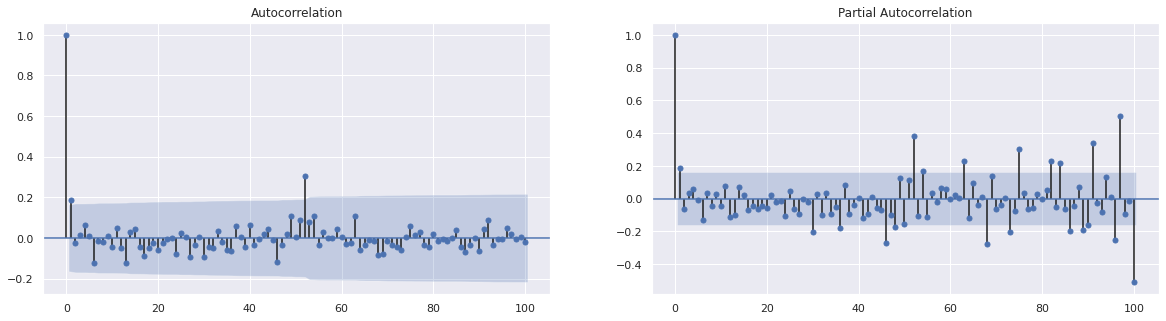

In [114]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(df20.values, lags=100, alpha=0.05, ax=axes[0])
plot_pacf(df20.values, lags=100, alpha=0.05, ax=axes[1])
plt.show()

This particular store shows additional seasonalities from week 29 and 46 which will be included in the AR model.


[[ 0.10152405 -0.06075363 -0.03674768  0.04809011  0.01512973 -0.07177803
   0.46948   ]] [1141392.1022793]
Score factor: 0.34


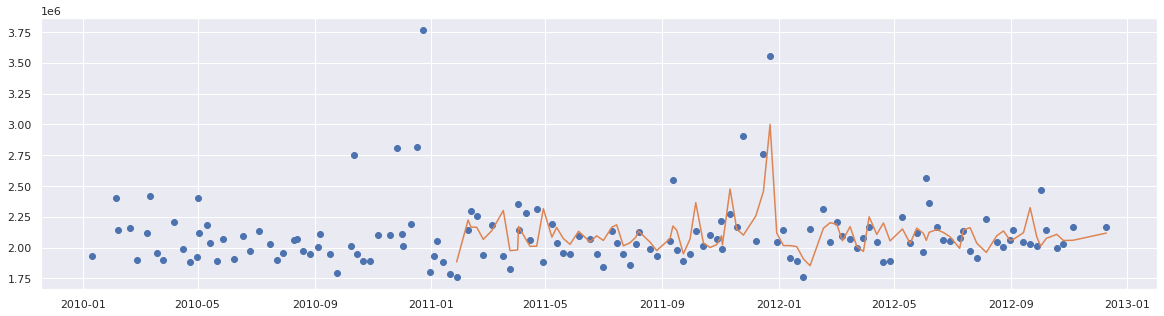

In [115]:
orders=np.array([1,6,18,29,38,46,52])
coef, intercept = fit_ar_model(df20,orders)
pred=pd.DataFrame(index=df20.index, data=predict_ar_model(df20, orders, coef, intercept))
plt.figure(figsize=(20,5))
plt.plot(df20, 'o')
plt.plot(pred)
plt.show()

AR Residuals: avg -0.01, std 0.08


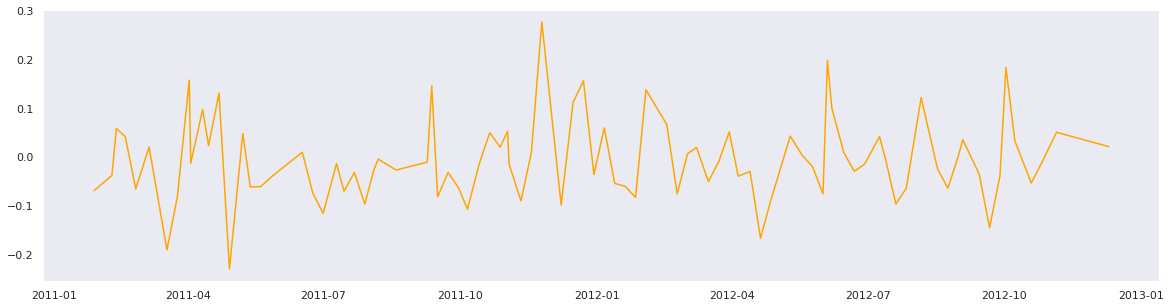

In [116]:
diff=(df20['Weekly_Sales']-pred[0])/df20['Weekly_Sales']

print('AR Residuals: avg %.2f, std %.2f' % (diff.mean(), diff.std()))
 
plt.figure(figsize=(20,5))
plt.plot(diff, c='orange')
plt.grid()
plt.show()

The predictive model has an R^2 score factor of 0.34 (max score for perfect prediction would be 1.). The residual distribution is centered in 0 with an STD of 8%.



# Look for predictive power from external variables

In [117]:
dfext=sales_df.where( sales_df['Store'] == 20)
dfext=dfext.dropna()
dfext=dfext.groupby(by=['Date'], as_index=False)[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
                                                  'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].mean()
dfext = dfext.set_index('Date')
dfext.head()

,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
Date,,,,,,,,,
2010-01-10,16.155556,2.707,204.885097,7.484,0.0,0.0,0.0,0.0,0.0
2010-02-04,10.555556,2.850,204.025284,7.856,0.0,0.0,0.0,0.0,0.0
2010-02-07,21.166667,2.815,204.465056,7.527,0.0,0.0,0.0,0.0,0.0
2010-02-19,-3.650000,2.745,204.432100,8.187,0.0,0.0,0.0,0.0,0.0
2010-02-26,0.177778,2.754,204.463087,8.187,0.0,0.0,0.0,0.0,0.0


In [118]:
dfext.describe()

,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,13.028555,3.417608,209.038131,7.371413,4013.042867,1815.373007,956.883986,1934.258951,2159.098951
std,9.191026,0.443029,4.176736,0.305069,8231.447936,9402.698654,8733.609037,5799.518501,4293.364349
min,-6.450000,2.699000,203.610178,6.961000,0.000000,-0.990000,0.000000,0.000000,0.000000
25%,6.036111,2.921000,204.774194,7.139000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.805556,3.541000,208.556714,7.287000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.294444,3.809000,213.372861,7.484000,6185.310000,70.000000,17.675000,1325.400000,3484.570000
max,26.222222,4.066000,216.151590,8.187000,58928.520000,97740.990000,101378.790000,53603.990000,35675.620000


In [119]:
dfext['shifted_sales'] =df20['Weekly_Sales'].shift(-1)
dfext.head()

,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,shifted_sales
Date,,,,,,,,,,
2010-01-10,16.155556,2.707,204.885097,7.484,0.0,0.0,0.0,0.0,0.0,2405395.22
2010-02-04,10.555556,2.850,204.025284,7.856,0.0,0.0,0.0,0.0,0.0,2143676.77
2010-02-07,21.166667,2.815,204.465056,7.527,0.0,0.0,0.0,0.0,0.0,2161549.76
2010-02-19,-3.650000,2.745,204.432100,8.187,0.0,0.0,0.0,0.0,0.0,1898193.95
2010-02-26,0.177778,2.754,204.463087,8.187,0.0,0.0,0.0,0.0,0.0,2121561.41


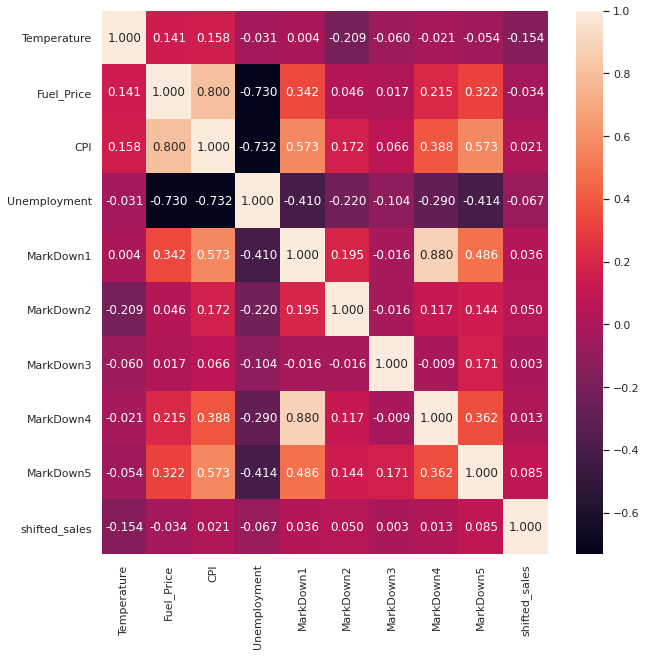

In [120]:
#import seaborn as sns
corr = dfext.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt=".3f", xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

In [121]:
corr['shifted_sales'].sort_values(ascending=False)

shifted_sales    1.000000
MarkDown5        0.084797
MarkDown2        0.050189
MarkDown1        0.035654
CPI              0.021002
MarkDown4        0.013042
MarkDown3        0.002624
Fuel_Price      -0.033798
Unemployment    -0.067482
Temperature     -0.154182
Name: shifted_sales, dtype: float64

The external variables available have some correlation with the 1-day lagged sales time series. This means that they have some degree of predictive power at 1 day and can be used to improve our model. The 'MarkDown' and the 'Temperature' being the most correlated and anti-correlate variables respectively.

In [122]:
#from sklearn.linear_model import LinearRegression
def fit_ar_model_ext(st, orders, ext, fitter=LinearRegression()):

  X=np.array([st.values[(i-orders)].squeeze() if i>=np.max(orders) else np.array(len(orders)*[np.nan]) for i in range(len(st))])

  X=np.append(X, ext.values, axis=1)

  mask = ~np.isnan(X[:,:1]).squeeze()

  Y= st.values

  fitter.fit(X[mask], Y[mask].ravel())

  print(fitter.coef_, fitter.intercept_)

  print('Score factor: %.2f' % fitter.score(X[mask], Y[mask]))

  return fitter.coef_, fitter.intercept_

def predict_ar_model_ext(st, orders, ext, coef, intercept):

  X=np.array([st.values[(i-orders)].squeeze() if i>=np.max(orders) else np.array(len(orders) * [np.nan]) for i in range(len(st))])

  X=np.append(X, ext.values, axis=1)

  return np.array(np.dot(X, coef.T) + intercept)

[ 1.73675176e-01 -9.86789680e-02  2.04225311e-02  4.87747583e-02
  6.80358853e-03 -5.14169120e-02  4.34489390e-01 -2.85721072e+05
 -1.96775559e+05  1.34576197e+04 -3.55057928e+03 -2.13220168e+00
 -4.31016204e+00  7.08030804e+00  4.86724194e+00 -2.99957072e+00] 991057.627491429
Score factor: 0.58


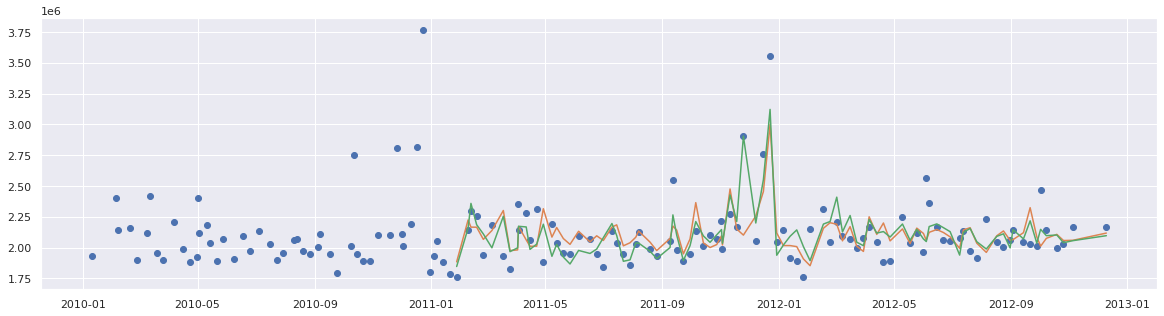

In [123]:

dfexternal=dfext.drop(['shifted_sales'], axis=1)
dfexternal= dfext[['Unemployment','Fuel_Price','CPI','Temperature', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']]

orders=np.array([1,6,18,29,38,46,52])
coef, intercept = fit_ar_model_ext(df20,orders,dfexternal)
pred_ext=pd.DataFrame(index=df20.index, data=predict_ar_model_ext(df20, orders, dfexternal, coef, intercept))
plt.figure(figsize=(20,5))
plt.plot(df20, 'o')
plt.plot(pred)
plt.plot(pred_ext)
plt.show()

AR Residuals: avg -0.01, std 0.08
AR with Ext Residuals: avg -0.00, std 0.07


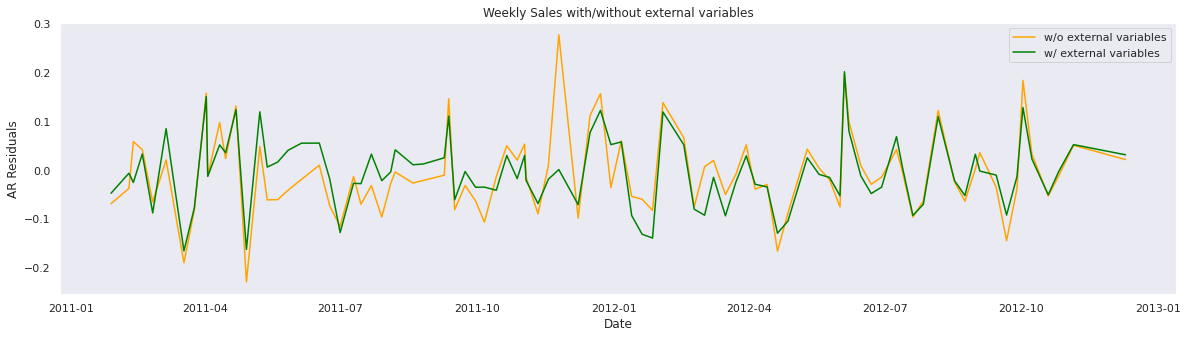

In [126]:
diff=(df20['Weekly_Sales']-pred[0])/df20['Weekly_Sales']
diff_ext=(df20['Weekly_Sales']-pred_ext[0])/df20['Weekly_Sales']

print('AR Residuals: avg %.2f, std %.2f' % (diff.mean(), diff.std()))
print('AR with Ext Residuals: avg %.2f, std %.2f' % (diff_ext.mean(), diff_ext.std()))
 
plt.figure(figsize=(20,5))
plt.plot(diff, c='orange', label='w/o external variables')
plt.plot(diff_ext, c='green', label='w/ external variables')
plt.title('Weekly Sales with/without external variables')
plt.xlabel('Date')
plt.ylabel('AR Residuals')
plt.legend()
plt.grid()
plt.show()



The model including the external variables improve the accuracy of the prediction by more than 40% ( R^2 score: 0.58% w.r.t 0.34). The standard deviation of the residual improve by about 30% (7% w.r.t. 8%).


# To do next:
---

* We will apply the forecast model with
external informations on each store and sum the result to forcast the total sales volume



In [127]:

#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [128]:
model =ARIMA(df20['Weekly_Sales'], order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


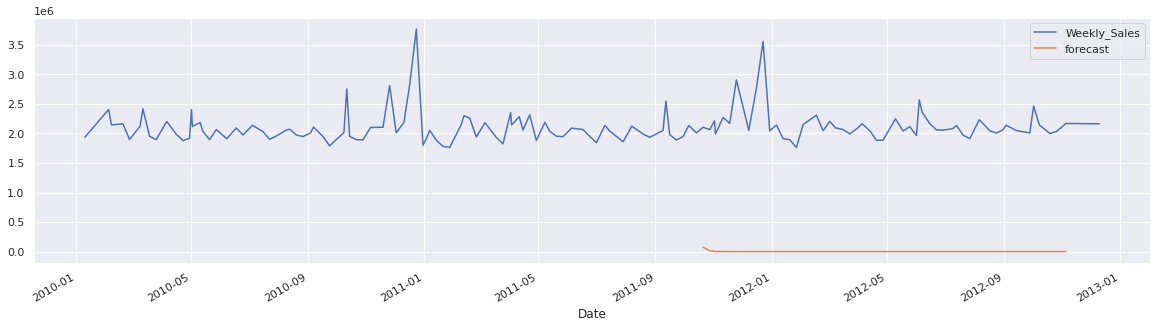

In [129]:
df20['forecast']= model_fit.predict(start=89, end=141, dynamic=True)
df20[['Weekly_Sales', 'forecast']].plot(figsize=(20,5))

In [130]:
#from statsmodels.tsa.statespace.sarimax import SARIMAX
#%matplotlib inline
model=sm.tsa.statespace.SARIMAX(df20['Weekly_Sales'], order=(1,1,1), seasonal_order=(1,1,0,52))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [131]:
results=model.fit(disp=False)
results.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 52)   Log Likelihood               -1251.219
Date:                            Mon, 30 Nov 2020   AIC                           2510.438
Time:                                    09:01:45   BIC                           2520.437
Sample:                                         0   HQIC                          2514.470
                                            - 143                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1696      0.232      0.732      0.464      -0.285       0.624
ma.L1         -0.5672      0.197     -2.878      0.004      -0.953      -0.181
ar.S.L52      -0.3683      0.060     -6.091      0.000      -0.487      -0.250
sigma2      7.615e+10   2.93e-12    2.6e+22      0.000    7.61e+10    7.61e+10
===================================================================================
Ljung-Box (Q):                       58.41   Jarque-Bera (JB):                10.04
Prob(Q):                              0.03   Prob(JB):                         0.01
Heteroskedasticity (H):               1.26   Skew:                             0.44
Prob(H) (two-sided):                  0.53   Kurtosis:                         4.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.59e+38. Standard errors may be unstable.
"""

Since the p-value of ar.L1(autoregressive term) is p>0.05 it means that ar.L1 is not contributing anything to our model.

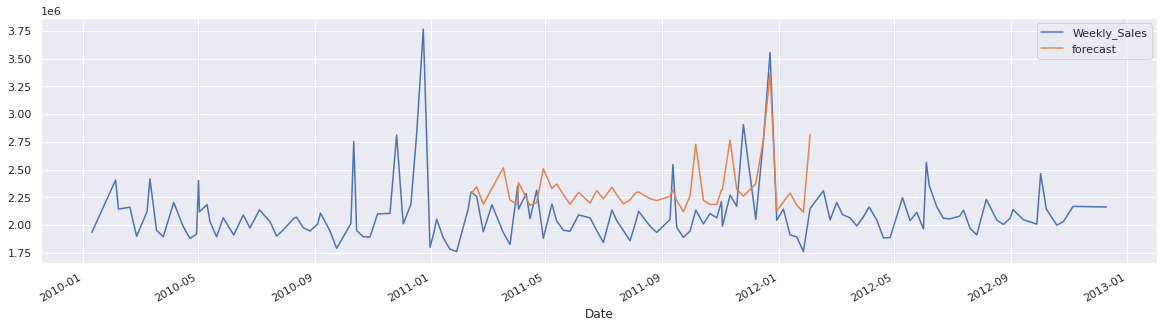

In [132]:
df20['forecast']=results.predict(start=54, end=104, dynamic=True)
df20[['Weekly_Sales', 'forecast']].plot(figsize=(20,5))

In [133]:
df20.column=['Weekly_Sales', 'forecast']
df20.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,Weekly_Sales,forecast
Date,,
2010-01-10,1933719.21,NaN
2010-02-04,2405395.22,NaN
2010-02-07,2143676.77,NaN
2010-02-19,2161549.76,NaN
2010-02-26,1898193.95,NaN


In [134]:

from pandas.tseries.offsets import DateOffset
future_dates=[df20.index[-1]+ DateOffset(weeks=x)for x in range(0,52)]

In [135]:
future_datest_df = pd.DataFrame(index=future_dates[1:], columns=df20.columns)
future_datest_df.tail()

,Weekly_Sales,forecast
2013-11-04,NaN,NaN
2013-11-11,NaN,NaN
2013-11-18,NaN,NaN
2013-11-25,NaN,NaN
2013-12-02,NaN,NaN


In [136]:
future_df=pd.concat([df20, future_datest_df])



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


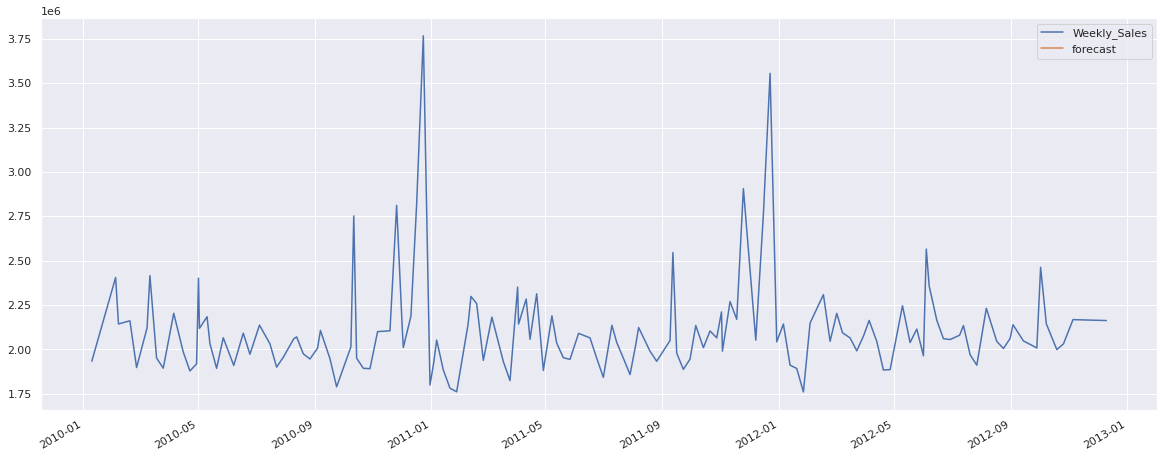

In [137]:
future_df['forecast'] = results.predict(start =141, end= 192, dynamic= True)
future_df[['Weekly_Sales', 'forecast']].plot(figsize=(20,8))

## Creating Dummy variables

In [138]:
sales_df_with_dummies = pd.get_dummies(sales_df, columns=['IsHoliday'], drop_first=True)
sales_df_with_dummies.head()


,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,IsHoliday_True
0,1,1,2010-05-02,24924.50,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,0
1,1,1,2010-12-02,46039.49,3.616667,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315,1
2,1,1,2010-02-19,41595.55,4.405556,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315,0
3,1,1,2010-02-26,19403.54,8.127778,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315,0
4,1,1,2010-05-03,21827.90,8.055556,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315,0


In [139]:
sales_df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Store           421570 non-null  int64         
 1   Dept            421570 non-null  int64         
 2   Date            421570 non-null  datetime64[ns]
 3   Weekly_Sales    421570 non-null  float64       
 4   Temperature     421570 non-null  float64       
 5   Fuel_Price      421570 non-null  float64       
 6   MarkDown1       421570 non-null  float64       
 7   MarkDown2       421570 non-null  float64       
 8   MarkDown3       421570 non-null  float64       
 9   MarkDown4       421570 non-null  float64       
 10  MarkDown5       421570 non-null  float64       
 11  CPI             421570 non-null  float64       
 12  Unemployment    421570 non-null  float64       
 13  Type            421570 non-null  int64         
 14  Size            421570 non-null  int

In [140]:
sales_df.IsHoliday.value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

Text(0.5, 0, 'IsHoliday')

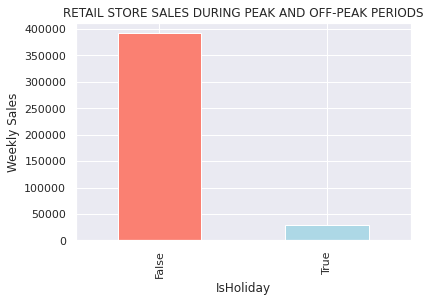

In [144]:
sales_df.IsHoliday.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.title("RETAIL STORE SALES DURING PEAK AND OFF-PEAK PERIODS")
plt.ylabel('Weekly Sales')
plt.xlabel('IsHoliday')



We have 29661 Weekly Sales on Holiday/Peak and 391909 Weekly Sales without Holiday/ offpeak


In [145]:


categorical_val = []
continous_val = []
for column in sales_df_with_dummies.columns:
    print('==============================')
    print(f"{column} : {sales_df_with_dummies[column].unique()}")
    if len(sales_df_with_dummies[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)



Store : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Dept : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]
Date : ['2010-05-02T00:00:00.000000000' '2010-12-02T00:00:00.000000000'
 '2010-02-19T00:00:00.000000000' '2010-02-26T00:00:00.000000000'
 '2010-05-03T00:00:00.000000000' '2010-12-03T00:00:00.000000000'
 '2010-03-19T00:00:00.000000000' '2010-03-26T00:00:00.000000000'
 '2010-02-04T00:00:00.000000000' '2010-09-04T00:00:00.000000000'
 '2010-04-16T00:00:00.000000000' '2010-04-23T00:00:00.000000000'
 '2010-04-30T00:00:00.000000000' '2010-07-05T00:00:00.000000000'
 '2010-05-14T00:00:00.000000000' '2010-05-21T00:00:00.000000000'
 '2010-05-28T00:00:00.000000000' '2010-04-06T00:00:00.000000000'
 '2010-

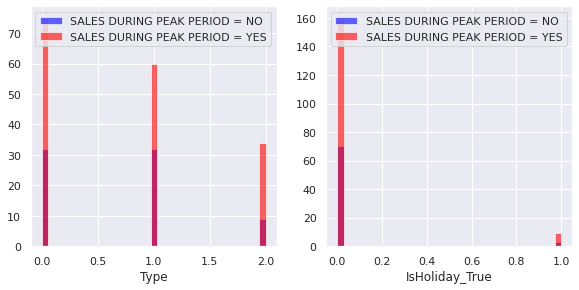

In [146]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    sales_df_with_dummies[sales_df_with_dummies['Weekly_Sales'] == 0][column].hist(bins=35, color='blue', label='SALES DURING PEAK PERIOD = NO', alpha=0.6)
    sales_df_with_dummies[sales_df_with_dummies['Weekly_Sales'] == 1][column].hist(bins=35, color='red', label='SALES DURING PEAK PERIOD = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

* cp {Chest Pain} : People with cp equl to 1, 2, 3 are more likely to have heart disease than people with cp equal to 0.
* restecg {resting electrocardiographic results} : People with value 1 (signals non-normal heart beat, can range from mild symptoms to severe problems) are more likely to have heart disease.
* exang {exercise induced angina} : People with value 0 (No ==> exercice induced angina) have heart disease more than people with value 1 (Yes ==> exercice induced angina)
* slope {the slope of the peak exercise ST segment} : People with slope value equal to 2 (Downslopins: signs of unhealthy heart) are more likely to have heart disease than people with slope value equal to 0 (Upsloping: better heart rate with excercise) or 1 (Flatsloping: minimal change (typical healthy heart)).
* ca {number of major vessels (0-3) colored by flourosopy} : the more blood movement the better so people with ca equal to 0 are more likely to have heart disease.
* thal {thalium stress result} : People with thal value equal to 2 (fixed defect: used to be defect but ok now) are more likely to have heart disease.



ValueError: ignored

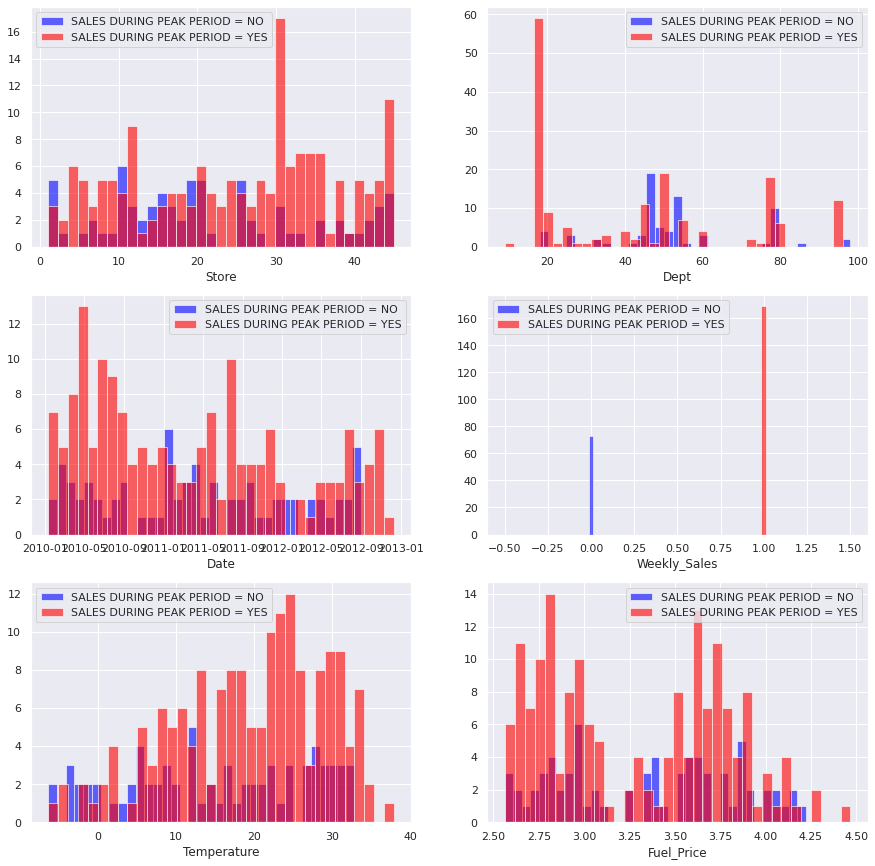

In [147]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    sales_df_with_dummies[sales_df_with_dummies["Weekly_Sales"] == 0][column].hist(bins=35, color='blue', label='SALES DURING PEAK PERIOD = NO', alpha=0.6)
    sales_df_with_dummies[sales_df_with_dummies["Weekly_Sales"] == 1][column].hist(bins=35, color='red', label='SALES DURING PEAK PERIOD = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)



*    trestbps : resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
*    chol {serum cholestoral in mg/dl} : above 200 is cause for concern.
*   thalach {maximum heart rate achieved} : People how acheived a maximum more than 140 are more likely to have heart disease.
*    oldpeak ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

